<a href="https://colab.research.google.com/github/SinghTanmay024/House-Hold-Energy-Data/blob/main/HHED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pprint
from  sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [145]:
data1 = pd.read_csv('/content/D202.csv')

In [146]:
data1

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...,...
38728,Electric usage,11/29/2017,9:00,9:14,0.03,kWh,$0.01,NaN
38729,Electric usage,11/29/2017,9:15,9:29,0.03,kWh,$0.01,NaN
38730,Electric usage,11/29/2017,9:30,9:44,0.03,kWh,$0.01,NaN
38731,Electric usage,11/29/2017,9:45,9:59,0.03,kWh,$0.01,NaN


In [147]:
print("first data point in time, START TIME: {}".format(data1["DATE"].min()))
print("last data point in time, START TIME: {}".format(data1["DATE"].max()))

first data point in time, START TIME: 1/1/2017
last data point in time, START TIME: 9/9/2017


In [148]:
data1.shape

(38733, 8)

In [149]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38733 entries, 0 to 38732
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        38733 non-null  object 
 1   DATE        38733 non-null  object 
 2   START TIME  38733 non-null  object 
 3   END TIME    38733 non-null  object 
 4   USAGE       38733 non-null  float64
 5   UNITS       38733 non-null  object 
 6   COST        38733 non-null  object 
 7   NOTES       0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 2.4+ MB


In [150]:
data1["COST"] = data1["COST"].str.replace("$", "", regex=False).astype(float)

In [151]:
data1 = data1.set_index('DATE')
data1.index = pd.to_datetime(data1.index)

In [152]:
data1['TYPE'].unique()

array(['Electric usage'], dtype=object)

In [153]:
data1['UNITS'].unique()

array(['kWh'], dtype=object)

In [154]:
data1 = data1.drop(["TYPE","UNITS","NOTES"], axis=1)

In [155]:
data1

,START TIME,END TIME,USAGE,COST
DATE,,,,
2016-10-22,0:00,0:14,0.01,0.00
2016-10-22,0:15,0:29,0.01,0.00
2016-10-22,0:30,0:44,0.01,0.00
2016-10-22,0:45,0:59,0.01,0.00
2016-10-22,1:00,1:14,0.01,0.00
...,...,...,...,...
2017-11-29,9:00,9:14,0.03,0.01
2017-11-29,9:15,9:29,0.03,0.01
2017-11-29,9:30,9:44,0.03,0.01


In [156]:
data1 = data1[['USAGE','COST']]

In [157]:
data1 = data1.resample('d').sum()

In [158]:
data1

,USAGE,COST
DATE,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84
...,...,...
2017-11-25,7.80,1.60
2017-11-26,10.32,2.12
2017-11-27,6.12,1.20


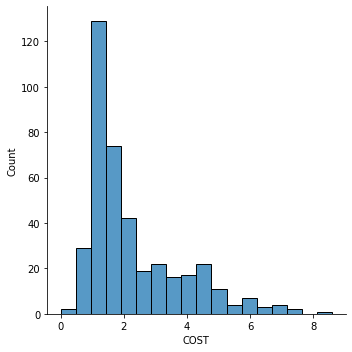

In [159]:
sns.displot(data1.COST)
plt.show()

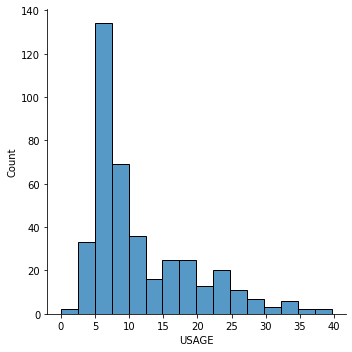

In [160]:
sns.displot(data1.USAGE)
plt.show()

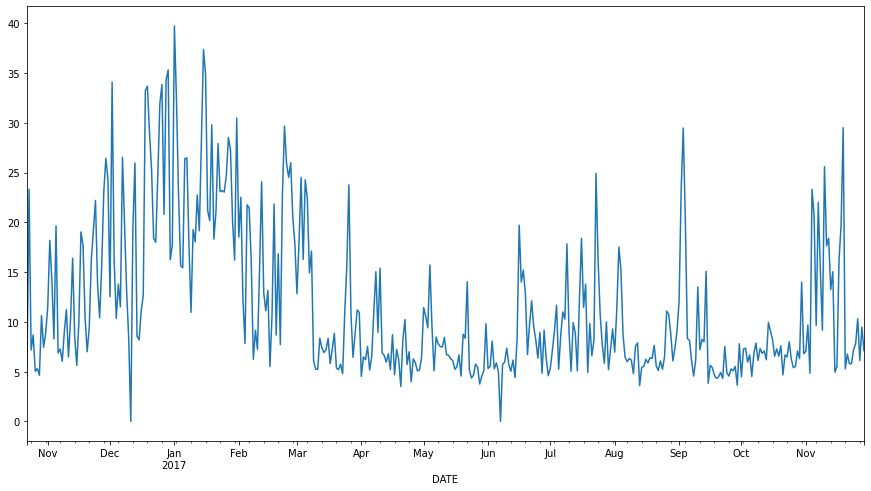

In [161]:
data1["USAGE"].plot(figsize=(15, 8))

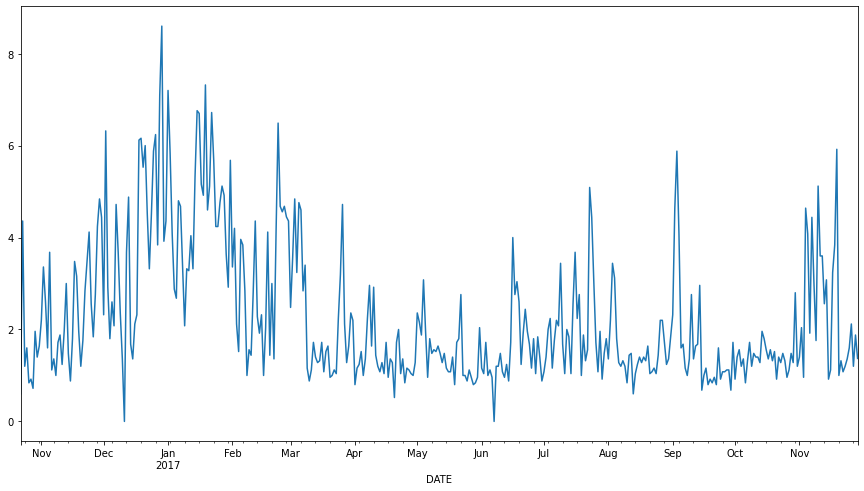

In [162]:
data1["COST"].plot(figsize=(15, 8))

# **yearly wise seeing which year consumption was high**

In [163]:
data1 = data1.resample('Y').sum()

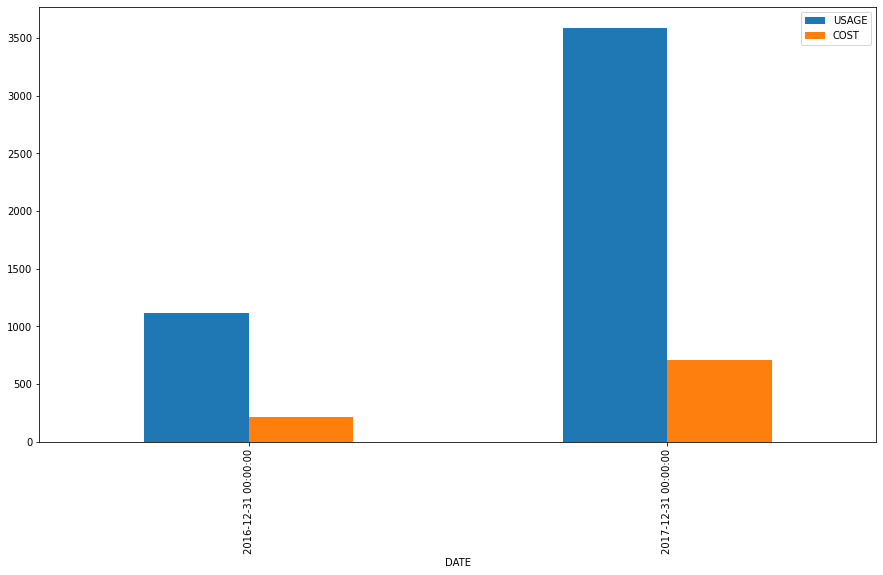

In [164]:
data1.plot(kind="bar",figsize=(15, 8))